Simple Litterrows EDA

In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import box

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import box
import cartopy

In [5]:
df = pd.read_excel('../files/LM_centroids.xlsx')

In [6]:
df_litterrows = df.copy().drop(columns=['Dec_time','Year', 'Month', 'Day','Date','Distance to land (m)'])

In [7]:
df_litterrows

,Latitude,Longitude,Str_time,CodeT,Pixels per LW
0,29.905255,32.493723,20170703T083011,T083011,13
1,30.435082,19.557948,20181230T092401,T092401,10
2,30.442452,19.572535,20210108T092351,T092351,9
3,30.673522,19.054099,20190305T092029,T092029,16
4,30.785358,18.213803,20181001T092031,T092031,90
...,...,...,...,...,...
14369,45.735564,13.622815,20200619T100029,T100029,218
14370,45.737578,13.281610,20210629T100031,T100031,20
14371,45.737928,13.301252,20170822T101031,T101031,17
14372,45.738978,13.295139,20200719T100029,T100029,17


subset dataset to northern italy region <br>![Screenshot 2025-04-13 at 21.45.18.png](<attachment:Screenshot 2025-04-13 at 21.45.18.png>)
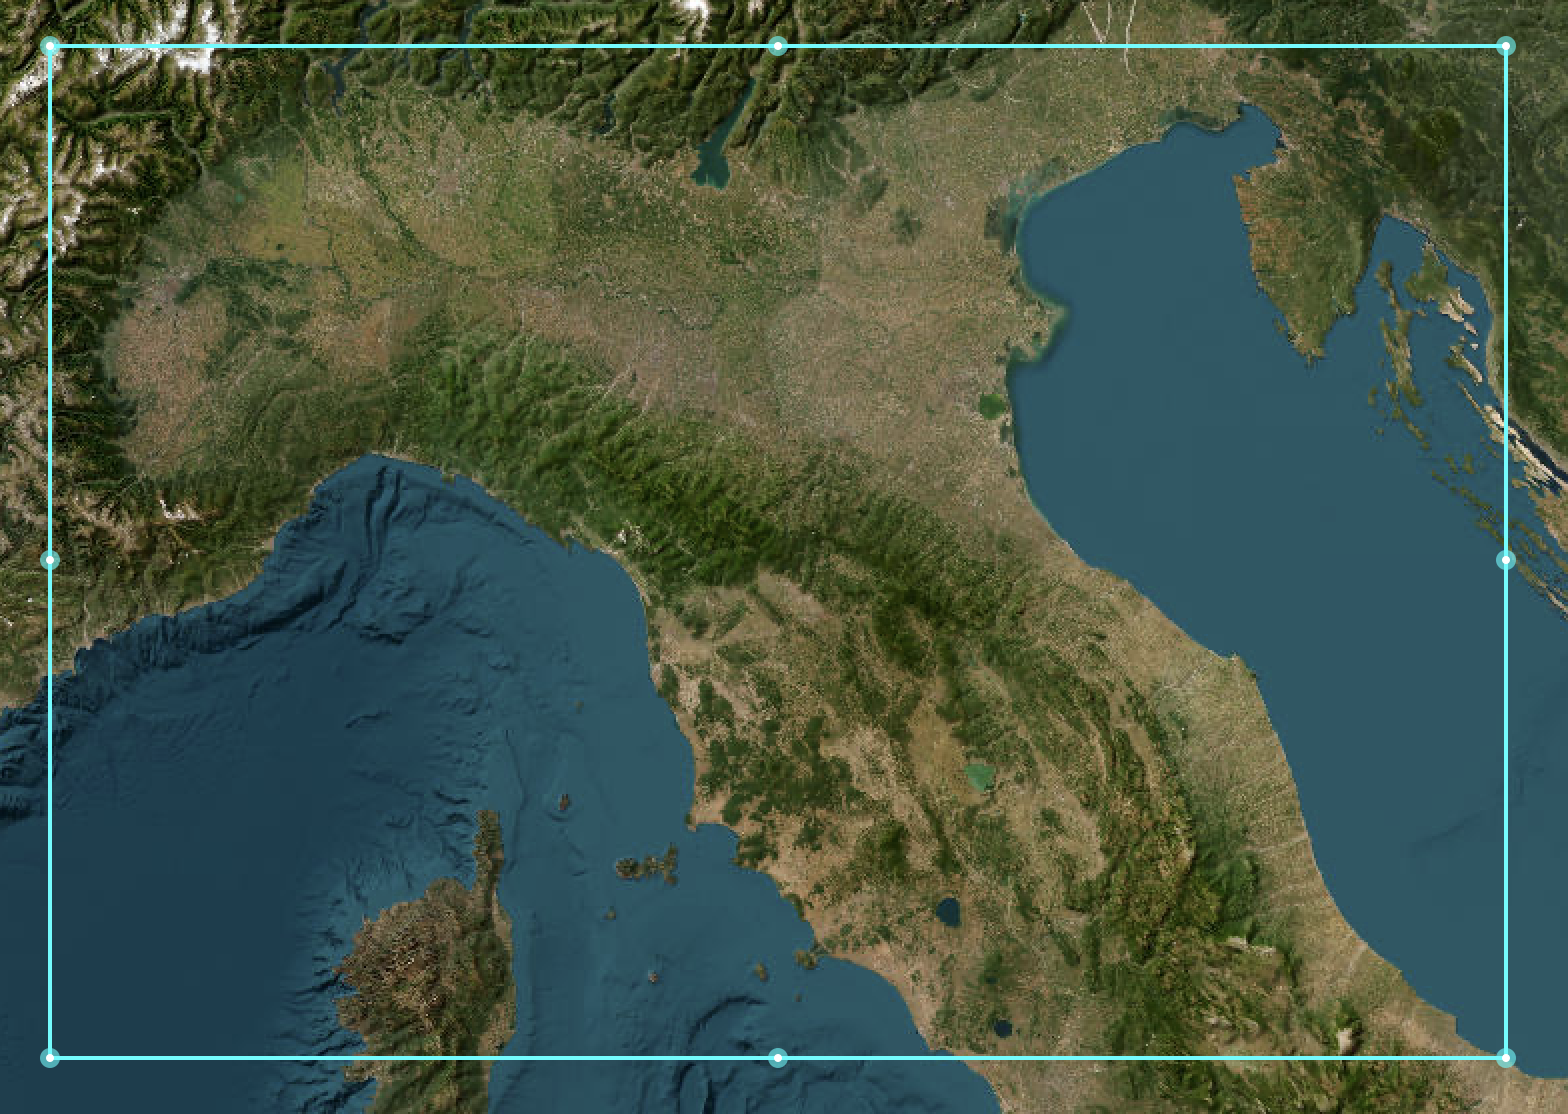

In [8]:
# Define the bounding box
lat_min, lat_max = 42.0, 46.0  # Replace with your latitude range
lon_min, lon_max = 7.0, 15.0  # Replace with your longitude range

# Filter the dataframe
filtered_df = df_litterrows[(df_litterrows['Latitude'] >= lat_min) & 
                            (df_litterrows['Latitude'] <= lat_max) & 
                            (df_litterrows['Longitude'] >= lon_min) & 
                            (df_litterrows['Longitude'] <= lon_max)]

filtered_df

,Latitude,Longitude,Str_time,CodeT,Pixels per LW
8117,42.005305,7.259025,20180422T102031,T102031,34
8118,42.006010,7.909968,20180422T102031,T102031,38
8120,42.010062,7.138296,20180420T103019,T103019,13
8121,42.012594,8.310946,20180422T102031,T102031,32
8124,42.013935,14.953228,20190607T095031,T095031,21
...,...,...,...,...,...
14369,45.735564,13.622815,20200619T100029,T100029,218
14370,45.737578,13.281610,20210629T100031,T100031,20
14371,45.737928,13.301252,20170822T101031,T101031,17
14372,45.738978,13.295139,20200719T100029,T100029,17


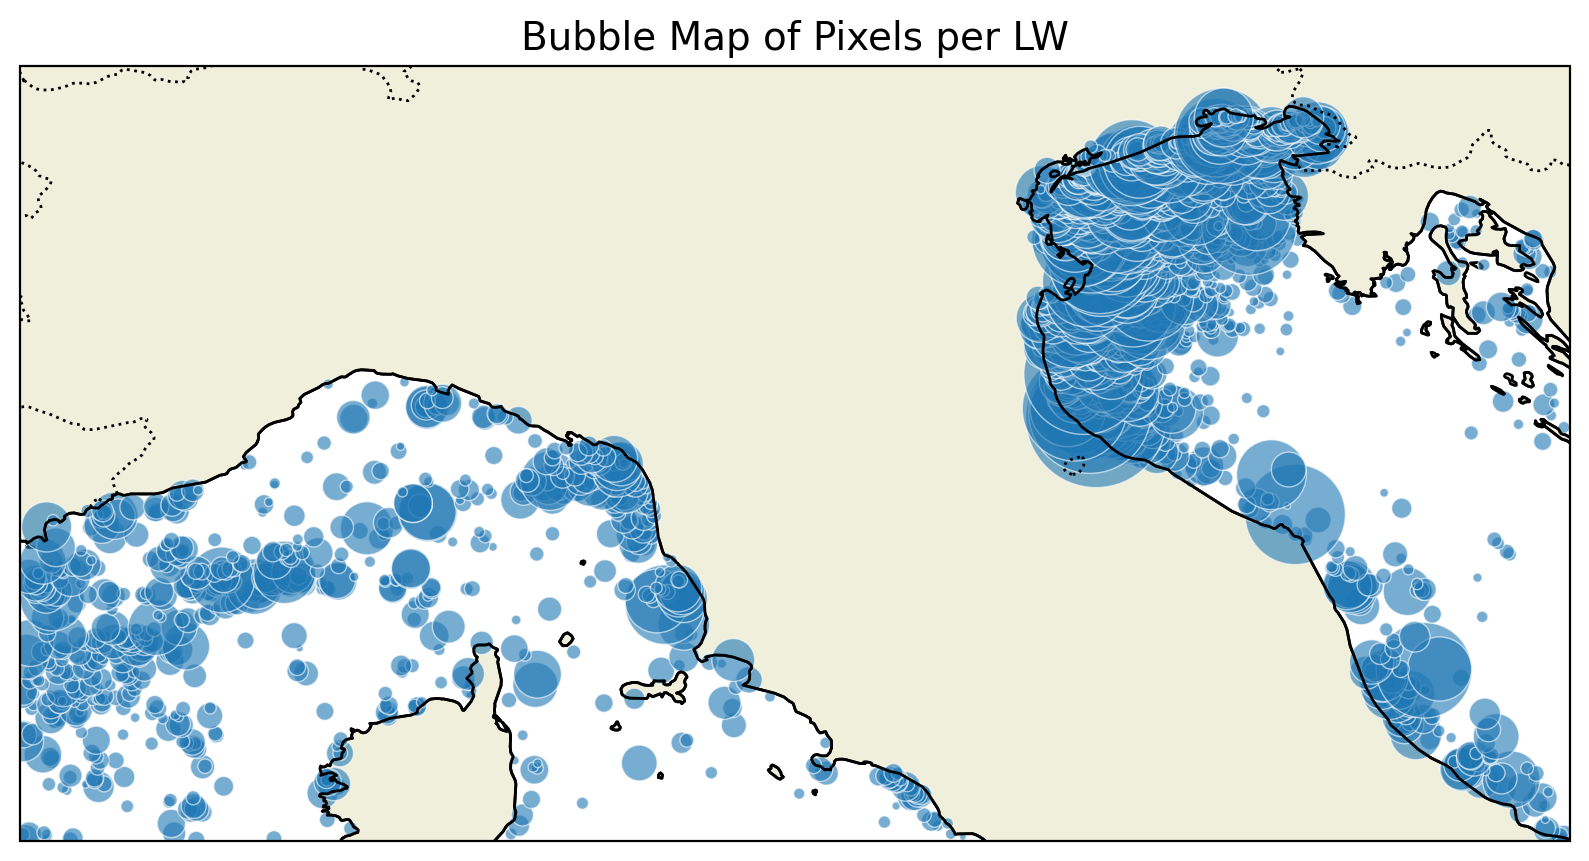

In [77]:
import matplotlib.pyplot as plt
# Create figure and axis with PlateCarree projection
fig, ax = plt.subplots(figsize=(10, 10), dpi=200, subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features (land, coastline, borders)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Scatter plot
scatter = ax.scatter(
    filtered_df['Longitude'], 
    filtered_df['Latitude'], 
    s=filtered_df['Pixels per LW'],  # Scale the size of the bubbles
    alpha=0.6, 
    edgecolors="w", 
    linewidth=0.5,
    transform=ccrs.PlateCarree()  # Ensure the scatter plot uses the same projection
)

# Set extent of the map
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Add labels and title
ax.set_title('Bubble Map of Pixels per LW', fontsize=14)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

# Show the plot
plt.show()

In [9]:
unique_datestr = filtered_df.copy().drop(columns=['CodeT','Latitude','Longitude']).groupby('Str_time').sum('Pixels per LW')

In [10]:
unique_datestr.sort_values(by='Pixels per LW',ascending=False)

,Pixels per LW
Str_time,
20180824T100031,17515
20180705T100031,13631
20210425T100019,9494
20180422T102031,9198
20190705T100039,7890
...,...
20201108T095221,10
20210321T100031,10
20200614T100031,10


In [11]:
unique_datestr.reset_index(inplace=True)

In [ ]:
pix_per_tile = unique_datestr.copy()
valid_tiles = ['T33TUL', 'T33SXC', 'T32TNN'] #, 'T32TQQ', 'T32TQR', 'T33TUL' other Po Delta tiles
## figure out how to match Str_time to tile from s2_product_unique based on string subset